In [19]:
import torch
from PIL import Image
from torchvision.transforms import v2
from module.model_builder.model import Model
from torchmetrics.text import CharErrorRate

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoints = torch.load("checkpoints2/pre4.pth.tar", map_location=device)
vocab = checkpoints['vocab']

# Create instance model
n_dim_model = 256
# --- Encoder Parameters ---
input_chanel_encoder = 1
hidden_dim_encoder = 384
n_head_encoder = 8
n_expansion_encoder = 8
n_layer_encoder = 6
# --- Decoder Parameters ---
n_head_decoder = 8
seq_length_decoder = 224
vocab_size_decoder = len(vocab)
n_expansion_decoder = 8
n_layer_decoder = 6
model = Model(n_dim_model, input_chanel_encoder, hidden_dim_encoder, n_head_encoder, n_expansion_encoder, n_layer_encoder,
              n_head_decoder, seq_length_decoder, vocab_size_decoder, n_expansion_decoder, n_layer_decoder).to(device)
model.load_state_dict(checkpoints['model_state_dict'])

<All keys matched successfully>

In [20]:
transform = v2.Compose([
    v2.PILToTensor(),
    v2.ToDtype(torch.float)
])

In [21]:
idx_start = vocab['<start>']
idx_end = vocab['<end>']

In [22]:
print(idx_start, idx_end)

1 2


In [23]:
import random

paths = []
true_labels = []
with open('dataset/augment_labels.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    print(len(lines))
    temp = random.sample([i for i in range(len(lines))], 100)
    for idx in temp:
        line = lines[idx]
        line = line.rstrip()
        image_path, label = line.split('--------')
        paths.append(image_path)
        true_labels.append(label)

130802


Image path: im88757.png
Predicted text: TOTAL 6% SUPPLIES (INC. GST):
True text: TOTAL 6% SUPPLIES (INC. GST):
CER: 0.0


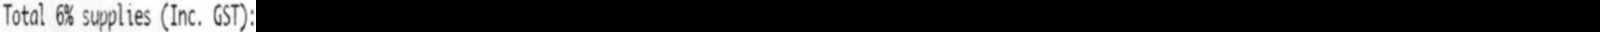

Image path: im26554.png
Predicted text: TAX (RM)
True text: TAX(RM)
CER: 0.1428571492433548


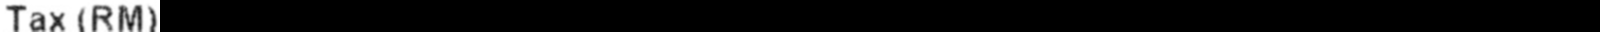

Image path: im65408.png
Predicted text: 21100 POTERPLIEGS
True text: 211010 PORTUGUES
CER: 0.5


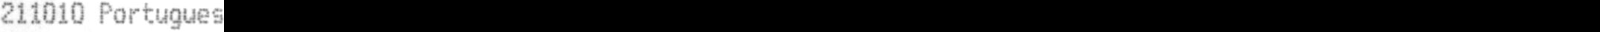

Image path: im103018.png
Predicted text: 2.90
True text: 2.90
CER: 0.0


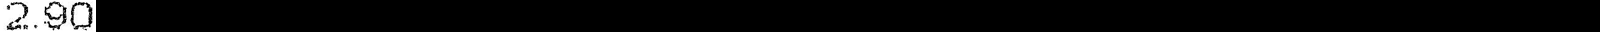

Image path: im85485.png
Predicted text: 0
True text: 0
CER: 0.0


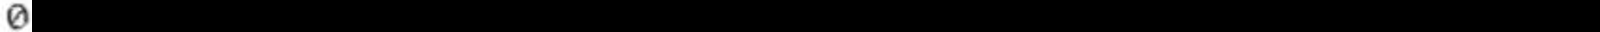

Image path: im62268.png
Predicted text: INVOICE NO.
True text: INVOICE NO.
CER: 0.0


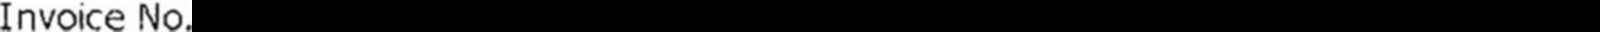

Image path: im32632.png
Predicted text: 2 X
True text: 2 X
CER: 0.0


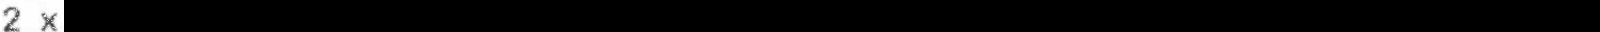

Image path: im52117.png
Predicted text: 31.80
True text: 31.80
CER: 0.0


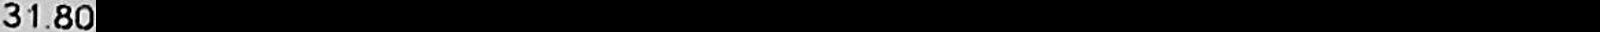

Image path: im50408.png
Predicted text: TYPE:
True text: TYPE:
CER: 0.0


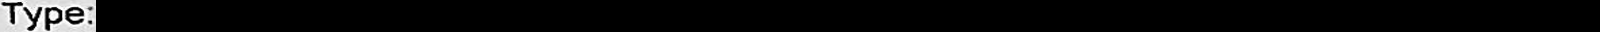

Image path: im107296.png
Predicted text: TAMPOI81200 JOHOR BAHRUJOHOR
True text: TAMPOI81200 JOHOR BAHRUJOHOR
CER: 0.0


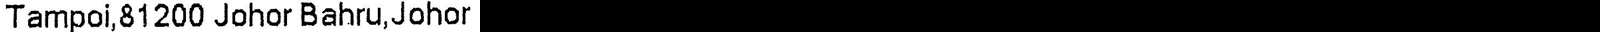

Image path: im119743.png
Predicted text: 18:25:59
True text: 18:25:59
CER: 0.0


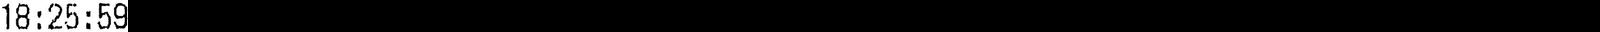

Image path: im128956.png
Predicted text: 2.20
True text: 2.20
CER: 0.0


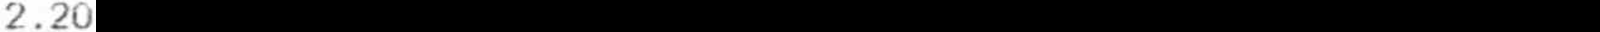

Image path: im19639.png
Predicted text: CASH
True text: CASH
CER: 0.0


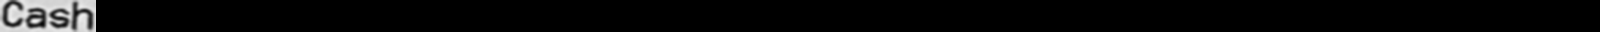

Image path: im636.png
Predicted text: NO.59 JALAN PERMAS 9/5
True text: NO.59 JALAN PERMAS 9/5
CER: 0.0


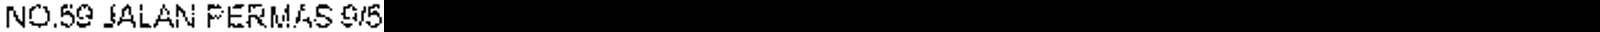

Image path: im75662.png
Predicted text: 0.72
True text: 0.72
CER: 0.0


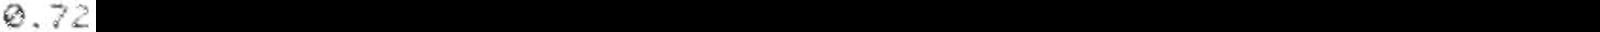

Image path: im54278.png
Predicted text: NO 8 JALAN 7/118B DESA TUN RAZAK
True text: NO 8 JALAN 7/118B DESA TUN RAZAK
CER: 0.0


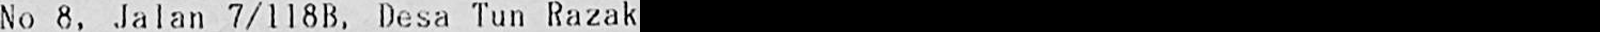

Image path: im43586.png
Predicted text: BEFORE LEAVING THE COUNTER.
True text: BEFORE LEAVING THE COUNTER.
CER: 0.0


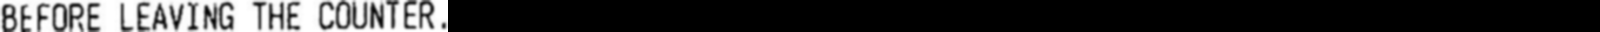

Image path: im103203.png
Predicted text: 100.00
True text: 100.00
CER: 0.0


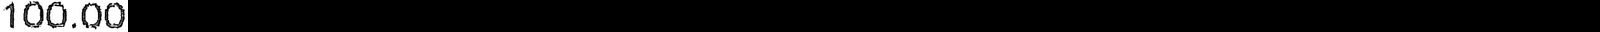

Image path: im86155.png
Predicted text: 0
True text: 0
CER: 0.0


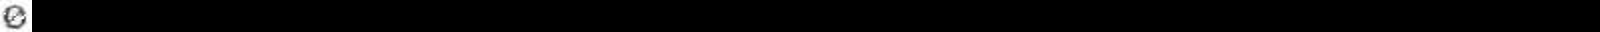

Image path: im35332.png
Predicted text: POS 10 : 8
True text: POS ID : G
CER: 0.30000001192092896


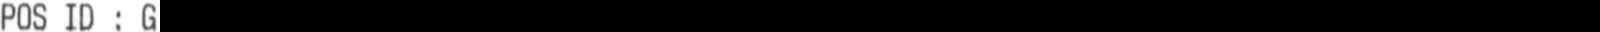

Image path: im39522.png
Predicted text: DOC NO.
True text: DOC NO.
CER: 0.0


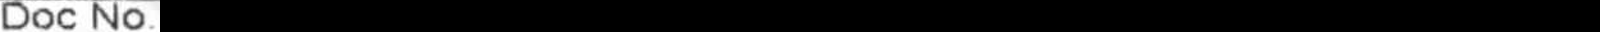

Image path: im101494.png
Predicted text: TAMAN BERKELEY
True text: TAMAN BERKELEY
CER: 0.0


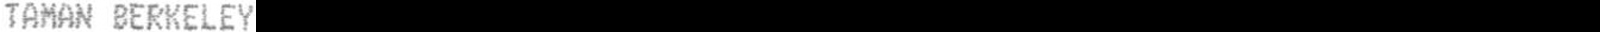

Image path: im18465.png
Predicted text: CODE
True text: CODE
CER: 0.0


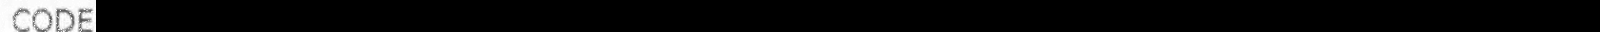

Image path: im130427.png
Predicted text: FIRM MONUAL EMPAINT COMPLETE
True text: FOR ANY ENQUIRY. PLEASE CONTACT US
CER: 0.7352941036224365


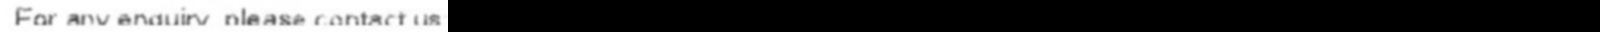

Image path: im55280.png
Predicted text: RM40.60
True text: RM40.60
CER: 0.0


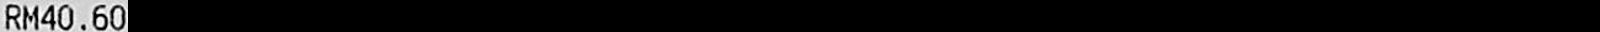

Image path: im110825.png
Predicted text: 11.30
True text: 11.30
CER: 0.0


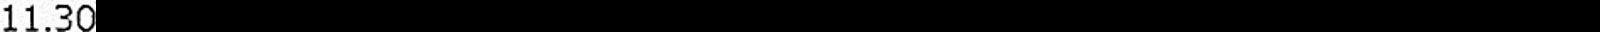

Image path: im3175.png
Predicted text: BANDAR BUKIT RAJA 41050
True text: BANDAR BUKIT RAJA 41050
CER: 0.0


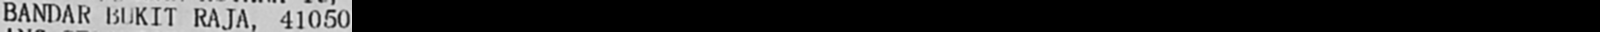

Image path: im4659.png
Predicted text: :
True text: :
CER: 0.0


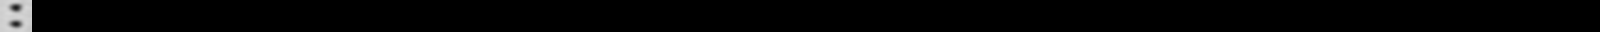

Image path: im41838.png
Predicted text: 0.31
True text: 0.31
CER: 0.0


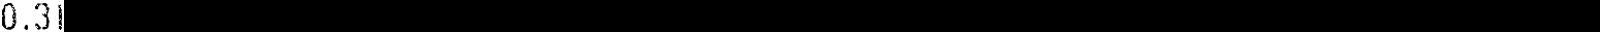

Image path: im38401.png
Predicted text: LOT 276 JALAN BANTING
True text: LOT 276 JALAN BANTING
CER: 0.0


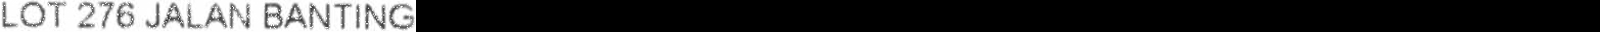

Image path: im99520.png
Predicted text: RM24.87
True text: RM34.87
CER: 0.1428571492433548


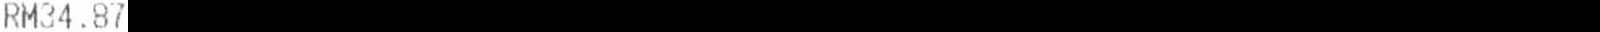

Image path: im60.png
Predicted text: EMAIL: MSAIGNATIONERY
True text: EMAIL:NG@OJCGROUP.COM
CER: 0.7142857313156128


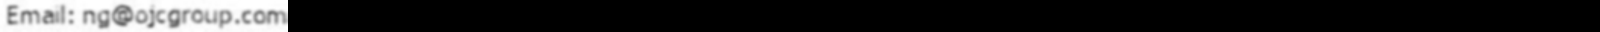

Image path: im58960.png
Predicted text: MACHINE TODAY
True text: MACHINE [003]
CER: 0.38461539149284363


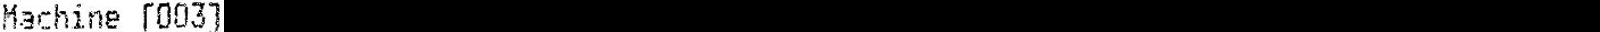

Image path: im128292.png
Predicted text: TOTAL
True text: TOTAL
CER: 0.0


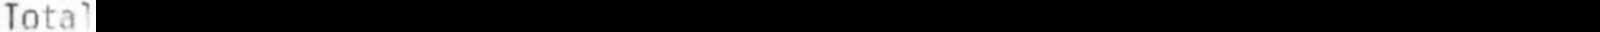

Image path: im93002.png
Predicted text: TOILET PAPER HOLDER BWJ-250#
True text: TOILET PAPER HOLDER BWJ-2503#
CER: 0.03448275849223137


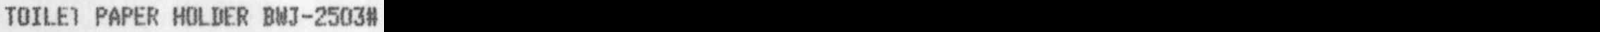

Image path: im119317.png
Predicted text: 08 JUN 2018 18:22
True text: 05 JUN 2018 18:22
CER: 0.05882352963089943


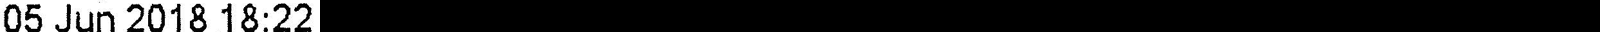

Image path: im111267.png
Predicted text: SANYU STATIONERY SHOP
True text: SANYU STATIONERY SHOP
CER: 0.0


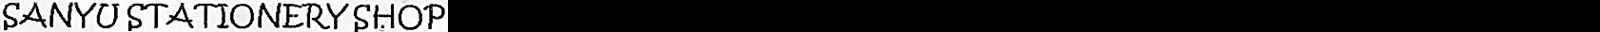

Image path: im94922.png
Predicted text: TOTAL INCL. GST@6%
True text: TOTAL INCL. GST@6%
CER: 0.0


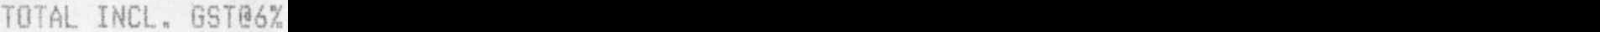

Image path: im42581.png
Predicted text: 6" -MEATBALL SUB
True text: 6" -MEATBALL SUB
CER: 0.0


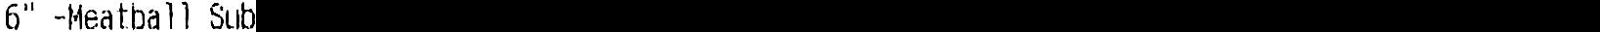

Image path: im115835.png
Predicted text: 168 BUCK BIN 7ESTI CORNER PAIR PARK
True text: 16G BLOCK B ZENITH CORPORATE PARK
CER: 0.4545454680919647


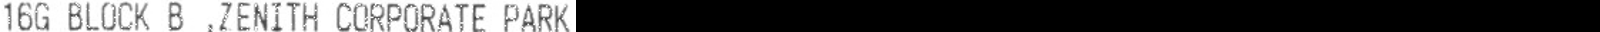

Image path: im21242.png
Predicted text: CODE
True text: CODE
CER: 0.0


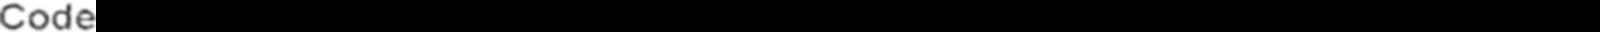

Image path: im29623.png
Predicted text: GOODS SOLD ARE NOT
True text: GOODS SOLD ARE NOT
CER: 0.0


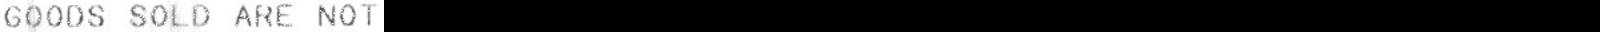

Image path: im123994.png
Predicted text: (GST ID NO: 000504664064)
True text: (GST ID NO: 000504664064)
CER: 0.0


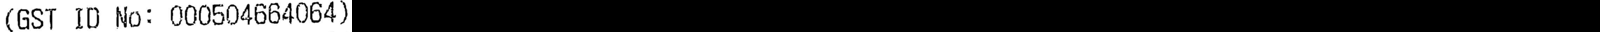

Image path: im74091.png
Predicted text: 14.60
True text: 14.69
CER: 0.20000000298023224


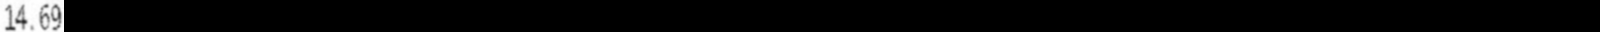

Image path: im71447.png
Predicted text: RM40.45
True text: RM40.45
CER: 0.0


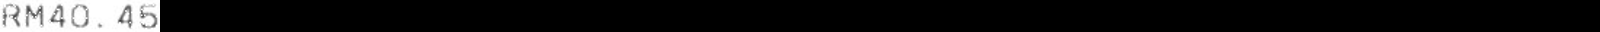

Image path: im37695.png
Predicted text: TOTAL SALES (EXCLUDING GST) :
True text: TOTAL SALES (EXCLUDING GST) :
CER: 0.0


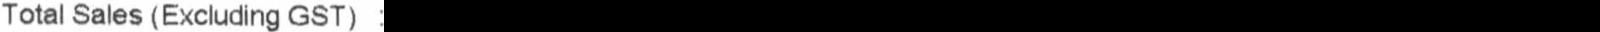

Image path: im42449.png
Predicted text: 0.40
True text: 0.40
CER: 0.0


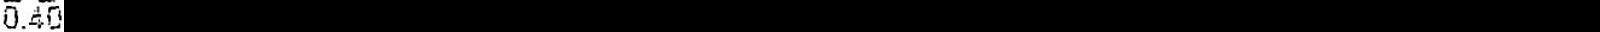

Image path: im36133.png
Predicted text: 4)95564920031K FEBRICOL -RX 10
True text: 4)9556492002837K FEBRICOL -RX 10
CER: 0.09375


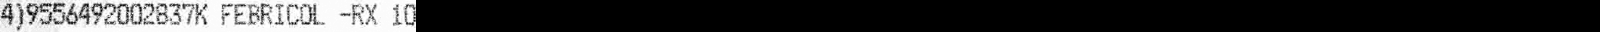

Image path: im53791.png
Predicted text: 28.75
True text: 28.75
CER: 0.0


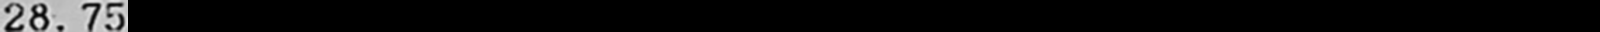

Image path: im39602.png
Predicted text: (GST)
True text: (GST)
CER: 0.0


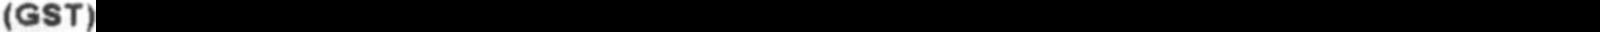

Image path: im23768.png
Predicted text: 5.67
True text: 5.67
CER: 0.0


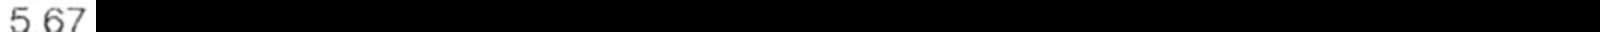

Image path: im115823.png
Predicted text: THONG RECEIPE
True text: THONG RECIPE
CER: 0.0833333358168602


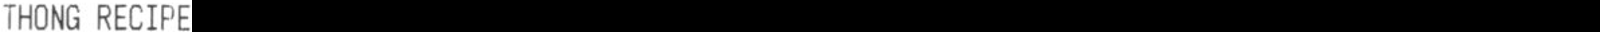

Image path: im9439.png
Predicted text: 49.70
True text: 49.70
CER: 0.0


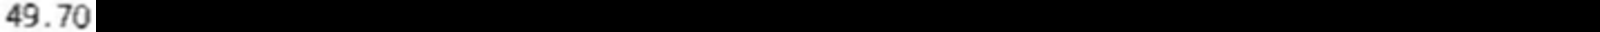

Image path: im82668.png
Predicted text: 0
True text: 0
CER: 0.0


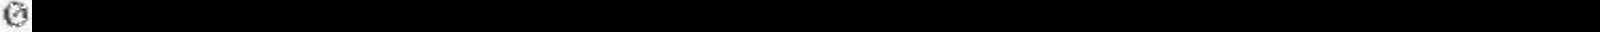

Image path: im50063.png
Predicted text: 714W
True text: 714WH
CER: 0.20000000298023224


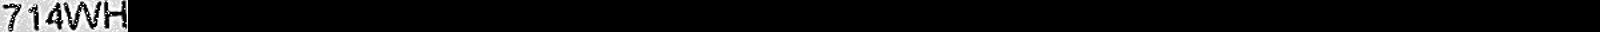

Image path: im59347.png
Predicted text: TOTAL LTEPURIO
True text: TOTAL (INCLUSIVE
CER: 0.5


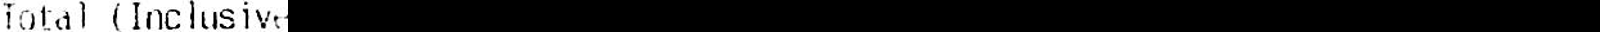

Image path: im7258.png
Predicted text: 1
True text: 1
CER: 0.0


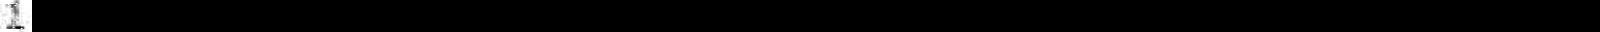

Image path: im13080.png
Predicted text: 7.50*1
True text: 7.50*1
CER: 0.0


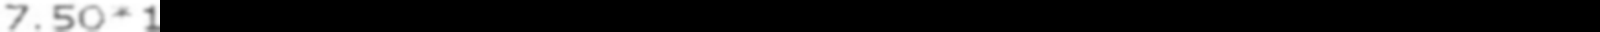

Image path: im100752.png
Predicted text: 13.78 S
True text: 13.78 S
CER: 0.0


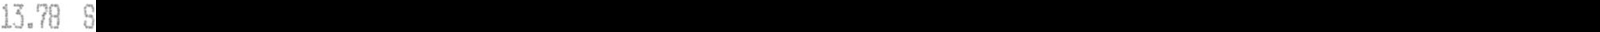

Image path: im12792.png
Predicted text: CHANGE RM
True text: CHANGE RM
CER: 0.0


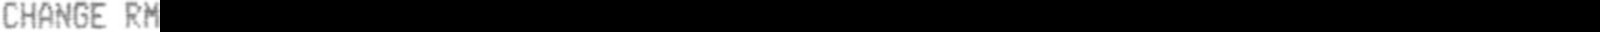

Image path: im7552.png
Predicted text: AMOUNT
True text: AMOUNT
CER: 0.0


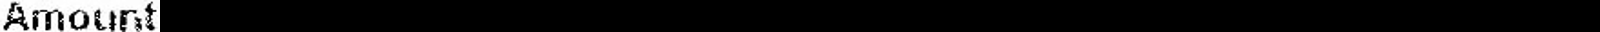

Image path: im46367.png
Predicted text: 18-03-18 12:09 SH01 ZJ86
True text: 18-03-18 12:09 SHO1 ZJ86
CER: 0.0416666679084301


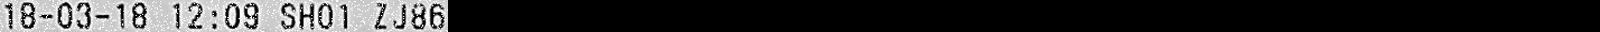

Image path: im63229.png
Predicted text: 40150 SHAH ALAM SELANGOR
True text: 40150 SHAH ALAM SELANGOR
CER: 0.0


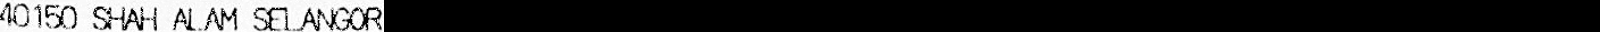

Image path: im54273.png
Predicted text: (GST REG NO. 001492992000)
True text: (GST REG NO. 001492992000)
CER: 0.0


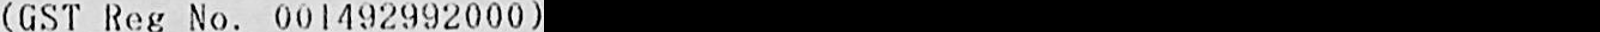

Image path: im18038.png
Predicted text: 26 X 33 (85HT) RED
True text: 26 X 33 (85HT) RED
CER: 0.0


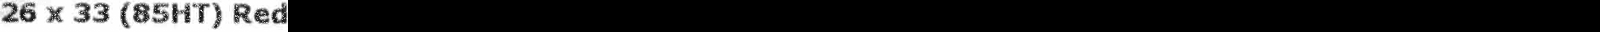

Image path: im28269.png
Predicted text: AMT (RM)
True text: AMT (RM)
CER: 0.0


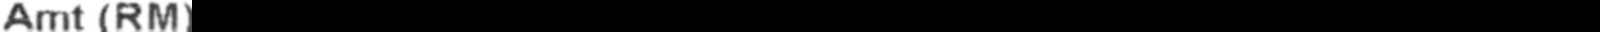

Image path: im1402.png
Predicted text: CHANGE
True text: CHANGE
CER: 0.0


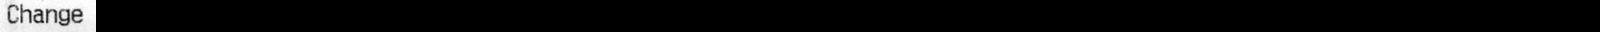

Image path: im105000.png
Predicted text: 10.00
True text: 10.00
CER: 0.0


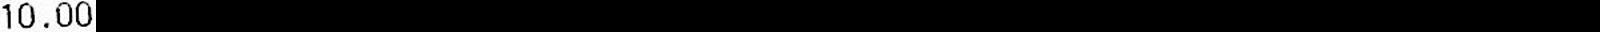

Image path: im115915.png
Predicted text: HERBAL TEA : BARWI MADO
True text: HERBAL TEA / BARLI MADU
CER: 0.1304347813129425


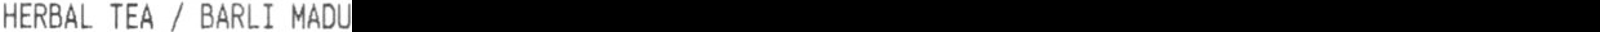

Image path: im65576.png
Predicted text: SEKSYEN 9 BANDAR MAHKOTA CHERAS
True text: SEKSYEN 9 BANDAR MAHKOTA CHERAS
CER: 0.0


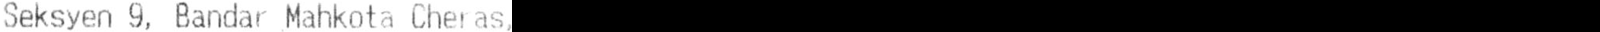

Image path: im28201.png
Predicted text: DISCOUNT :
True text: DISCOUNT :
CER: 0.0


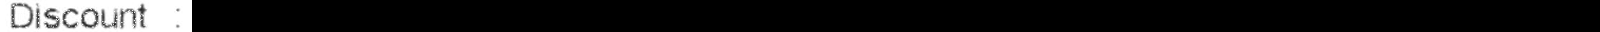

Image path: im12318.png
Predicted text: DOLE PINEAPPLE PCS
True text: DOLE PINEAPPLE PCS
CER: 0.0


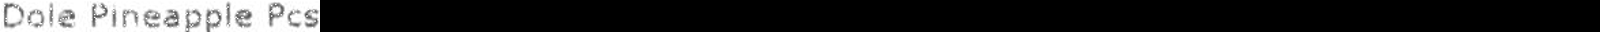

Image path: im32538.png
Predicted text: 43200 CHERAS SELANGOR
True text: 43200 CHERAS SELANGOR
CER: 0.0


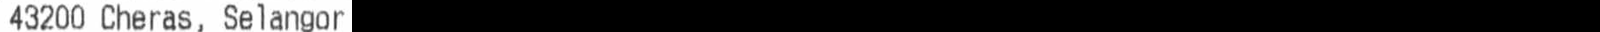

Image path: im78391.png
Predicted text: ISS
True text: ISS
CER: 0.0


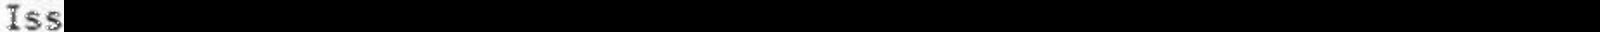

Image path: im22094.png
Predicted text: *
True text: *
CER: 0.0


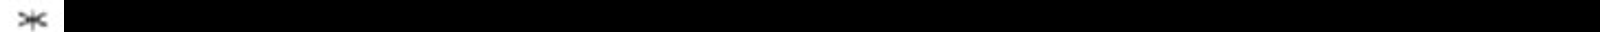

Image path: im59590.png
Predicted text: MOS
True text: M05
CER: 0.6666666865348816


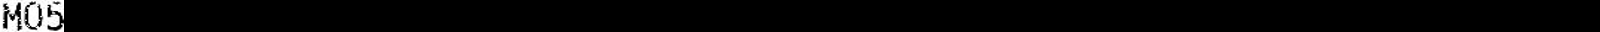

Image path: im122177.png
Predicted text: TAX INVOICE
True text: TAX INVOICE
CER: 0.0


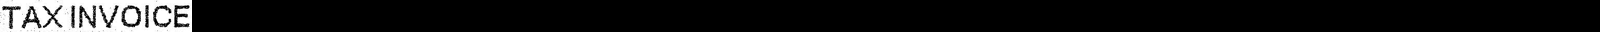

Image path: im102514.png
Predicted text: THANK YOU PLEASE COME AGAIN
True text: THANK YOU PLEASE COME AGAIN
CER: 0.0


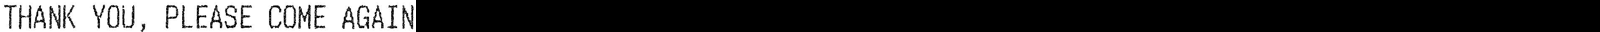

Image path: im109567.png
Predicted text: SR @ 6%
True text: SR @ 6%
CER: 0.0


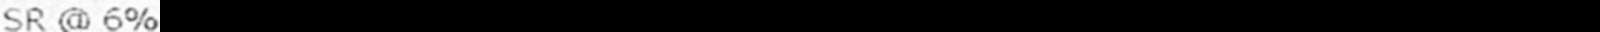

Image path: im94060.png
Predicted text: JALAN MAN MALURI KEPONG
True text: JALAN KAPAR MUKIM KAPAR
CER: 0.52173912525177


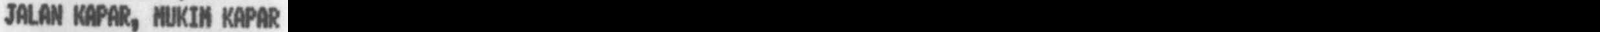

Image path: im51898.png
Predicted text: SYAHIAH
True text: SYAHIDAH
CER: 0.125


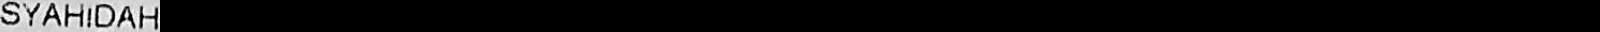

Image path: im14575.png
Predicted text: TR: CR0002815
True text: TRN: CR0002815
CER: 0.0714285746216774


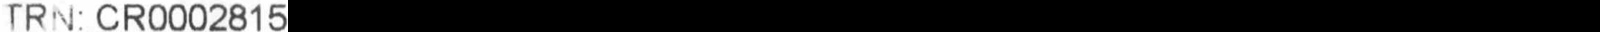

Image path: im11618.png
Predicted text: LIKE AND FOLLOW US ON FACEBOOK!
True text: LIKE AND FOLIOW US ON FACEBOOK!
CER: 0.032258063554763794


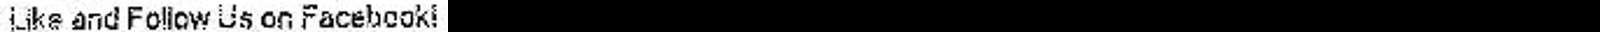

Image path: im64648.png
Predicted text: 221127 SLK CHOC
True text: 221127 S/R CHOCO
CER: 0.1875


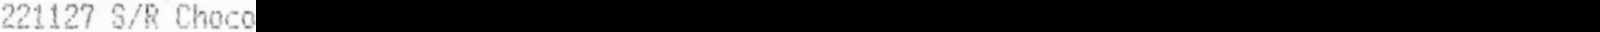

Image path: im118928.png
Predicted text: NETT TOTAL: RM8.20
True text: NETT TOTAL: RM8.20
CER: 0.0


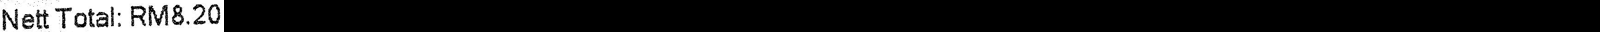

Image path: im85664.png
Predicted text: -5.04
True text: -5.04
CER: 0.0


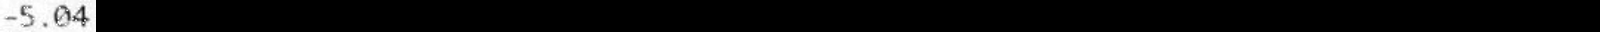

Image path: im127132.png
Predicted text: 6
True text: 6
CER: 0.0


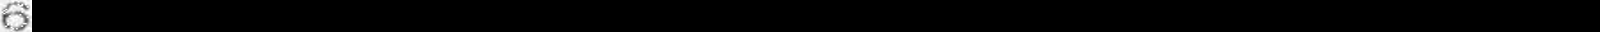

Image path: im125752.png
Predicted text: GST SUMMARY
True text: GST SUMMARY
CER: 0.0


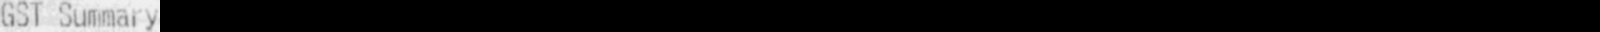

Image path: im56380.png
Predicted text: TAX INVOICE
True text: TAX INVOICE
CER: 0.0


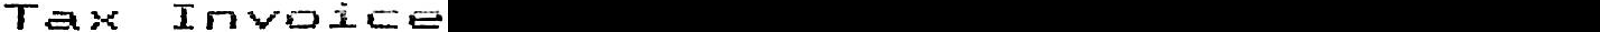

Image path: im78992.png
Predicted text: THE RECIPIENT OF GARDENIA'S PRODUCTS IS
True text: THE RECIPIENT OF GARDENIA'S PRODUCTS IS
CER: 0.0


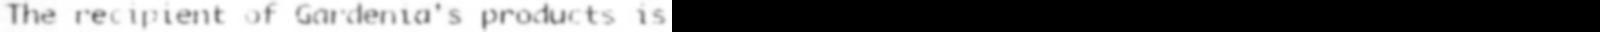

Image path: im11734.png
Predicted text: 1.00
True text: 1.00
CER: 0.0


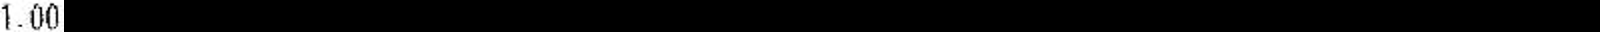

Image path: im18529.png
Predicted text: 15.000
True text: 15.0000
CER: 0.1428571492433548


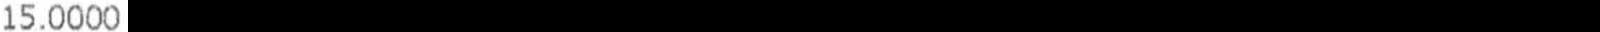

Image path: im90849.png
Predicted text: G. NO. 143G LATE MALL STORE !
True text: 43300 SERI KEMBANGAN SELANGOR
CER: 0.8965517282485962


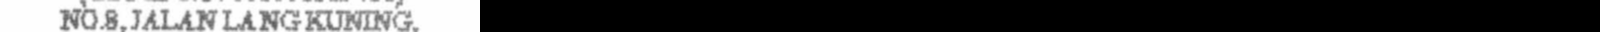

Image path: im52218.png
Predicted text: 213.78
True text: 213.78
CER: 0.0


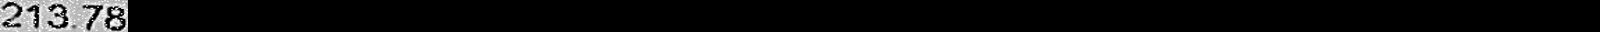

Image path: im23412.png
Predicted text: SR
True text: SR
CER: 0.0


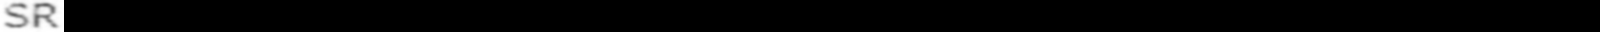

Image path: im62295.png
Predicted text: CASHIER NO.
True text: CASHIER NO.
CER: 0.0


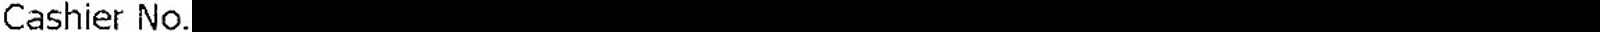

Image path: im68543.png
Predicted text: SR I00100000170- IMPORTED VEGGIES
True text: SR I00100000170- IMPORTED VEGGIES
CER: 0.0


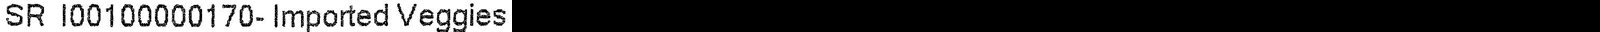

Image path: im118285.png
Predicted text: FACEBOOK.COM/BARWANGRICE
True text: FACEBOOK.COM/BARWANGRICE
CER: 0.0


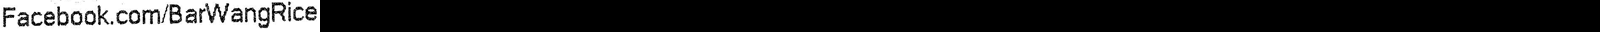

Image path: im57590.png
Predicted text: GOODS SOLD ARE NOT RETURNABLE.
True text: GOODS SOLD ARE NOT RETURNABLE.
CER: 0.0


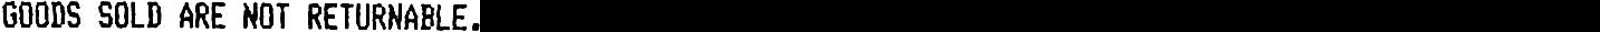

Image path: im80812.png
Predicted text: TAX INVOICE / ADJUSTMENT NOTE
True text: TAX INVOICE / ADJUSTMENT NOTE
CER: 0.0


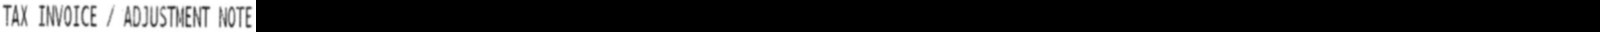

In [24]:
v = list(vocab.keys())
model.eval()
cers = []
with torch.no_grad():
    for t, path in enumerate(paths):
        import os
        image_path = os.path.join('dataset/augment_data', path) 
        labels = [idx_start]
        image = Image.open(image_path).convert("L")
        # Encoder
        input_encoder = transform(image)
        input_encoder = input_encoder.unsqueeze(0).to(device)
        for _ in range(seq_length_decoder):
            # Decoder
            input_decoder = torch.Tensor(labels).int()
            input_decoder = torch.unsqueeze(input_decoder, 0).to(device)
            output = model(input_encoder, input_decoder)
            idx = torch.argmax(output[:, -1, :])
            labels.append(idx.cpu().item())
            if idx.cpu().item() == idx_end:
                break
        predict_text = ''.join([v[i] for i in labels[1:-1]])
        true_text = true_labels[t]
        cer = CharErrorRate()
        print("Image path:", path)
        print("Predicted text:", predict_text)
        print("True text:", true_text)
        print("CER:", cer(predict_text, true_text).item())
        cers.append(cer(predict_text, true_text).item())
        import IPython.display as ipd
        ipd.display(image)

In [25]:
from torchmetrics import CharErrorRate, WordErrorRate


In [26]:
import numpy as np

print(np.mean(cers))

0.07360947411507368
